<a href="https://colab.research.google.com/github/ankitojha2705/ankitojha2705-CRISP_DM_SEMMA_AND_KDD-Models/blob/main/CRISP_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Business Understanding
This phase of the CRISP-DM process defines the project objectives and connects them with business needs. For our customer churn prediction project, we aim to address the financial and operational challenges associated with customer retention.

## 1.1 Objective
The primary objective of this project is to develop a predictive model that identifies customers who are likely to churn. By understanding the factors driving churn, the business can take proactive measures to retain valuable customers, reduce revenue loss, and improve customer satisfaction.

## 1.2 Business Goals
- **Reduce Customer Churn**: The main business goal is to minimize the churn rate by identifying at-risk customers and implementing targeted retention strategies.
- **Maximize Revenue Retention**: By reducing churn, the company can retain a significant portion of its recurring revenue, which is crucial for sustaining growth and profitability.
- **Enhance Customer Experience**: Understanding why customers leave enables the business to improve its products and services, leading to higher customer satisfaction and loyalty.

## 1.3 Success Criteria
- **Technical Success**: The predictive model should achieve high accuracy, precision, and recall on the testing data, indicating its ability to correctly identify customers who are likely to churn.
- **Business Success**: The insights gained from the model should be actionable, enabling the business to implement effective retention strategies and measure their impact on reducing churn.

## 1.4 Constraints and Challenges
- **Data Quality and Availability**: The accuracy of the model depends heavily on the quality of the data. Missing values or inaccurate data can reduce model performance.
- **Timeliness of Predictions**: The model needs to generate predictions in a timely manner so that the business can act swiftly to retain customers.
- **Balancing Cost and Retention Efforts**: Implementing retention strategies comes with a cost. It is crucial to balance the cost of these strategies with the potential revenue saved by retaining customers.


# Step **2**. Data Understanding

In [ ]:
import os

dataset_dir = '/root/.cache/kagglehub/datasets/muhammadshahidazeem/customer-churn-dataset/versions/1'
files = os.listdir(dataset_dir)
print(files)


['customer_churn_dataset-training-master.csv', 'customer_churn_dataset-testing-master.csv']


In [ ]:
import pandas as pd
import os

# Directory where the files are extracted
dataset_dir = '/root/.cache/kagglehub/datasets/muhammadshahidazeem/customer-churn-dataset/versions/1'

# Load the training dataset
training_file_path = os.path.join(dataset_dir, 'customer_churn_dataset-training-master.csv')
df_train = pd.read_csv(training_file_path)
print("Training Dataset:")
print(df_train.head())

# Load the testing dataset
testing_file_path = os.path.join(dataset_dir, 'customer_churn_dataset-testing-master.csv')
df_test = pd.read_csv(testing_file_path)
print("\nTesting Dataset:")
print(df_test.head())


Training Dataset:
   CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0    1.0  
4      


## Check Data Types and Missing Values
We want to ensure that we understand the data types and see if there are any missing values we need to address.



In [ ]:
# Check the data types and see if there are any missing values
print("Data Types and Missing Values in Training Dataset:")
print(df_train.info())
print("\nMissing Values in Training Dataset:")
print(df_train.isnull().sum())

print("\nData Types and Missing Values in Testing Dataset:")
print(df_test.info())
print("\nMissing Values in Testing Dataset:")
print(df_test.isnull().sum())


Data Types and Missing Values in Training Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB
None

Missing Values in Training Dataset:
CustomerID           1
Age                  1
Gender     

## Descriptive Statistics

In [ ]:
# Descriptive statistics for numerical features
print("Summary Statistics for Training Dataset:")
print(df_train.describe())


Summary Statistics for Training Dataset:
          CustomerID            Age         Tenure  Usage Frequency  \
count  440832.000000  440832.000000  440832.000000    440832.000000   
mean   225398.667955      39.373153      31.256336        15.807494   
std    129531.918550      12.442369      17.255727         8.586242   
min         2.000000      18.000000       1.000000         1.000000   
25%    113621.750000      29.000000      16.000000         9.000000   
50%    226125.500000      39.000000      32.000000        16.000000   
75%    337739.250000      48.000000      46.000000        23.000000   
max    449999.000000      65.000000      60.000000        30.000000   

       Support Calls  Payment Delay    Total Spend  Last Interaction  \
count  440832.000000  440832.000000  440832.000000     440832.000000   
mean        3.604437      12.965722     631.616223         14.480868   
std         3.070218       8.258063     240.803001          8.596208   
min         0.000000       0.00

## Initial Visualizations

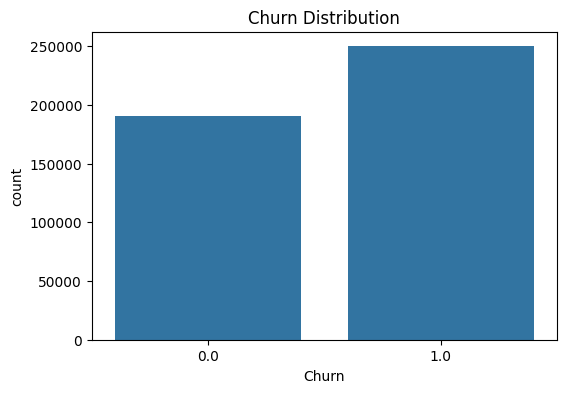

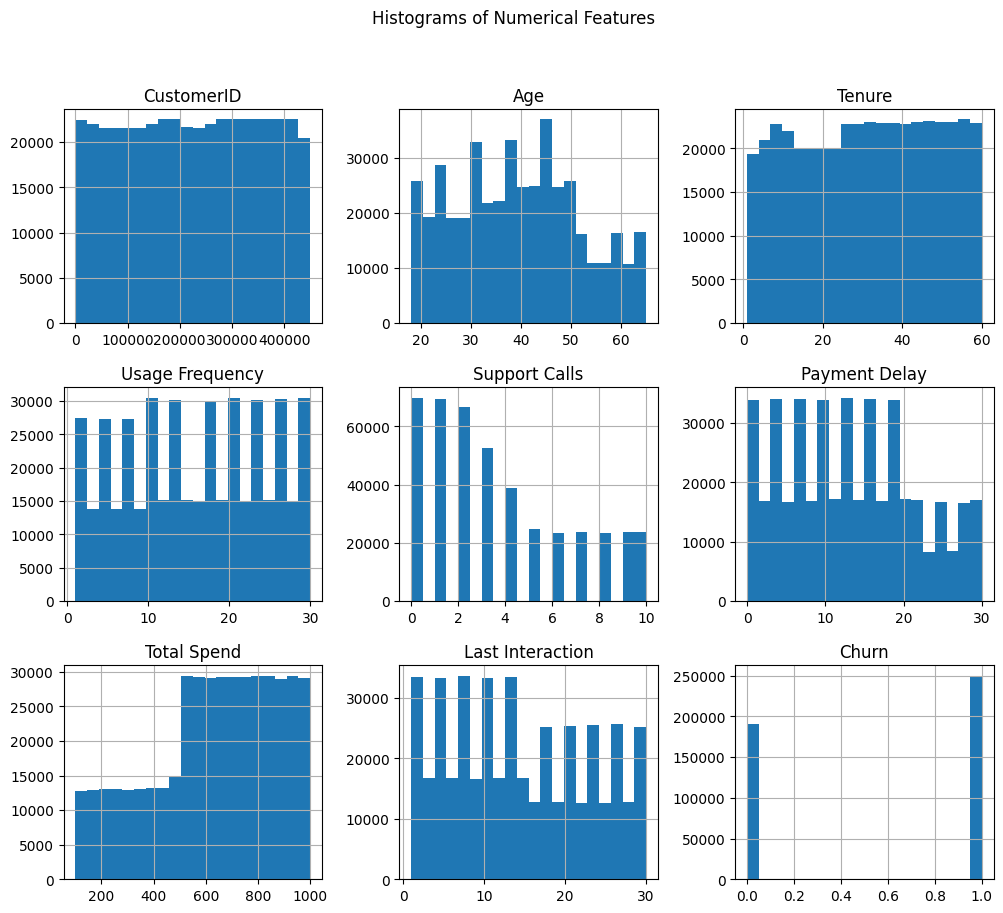

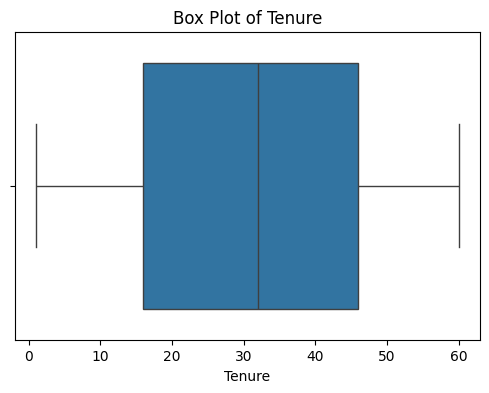

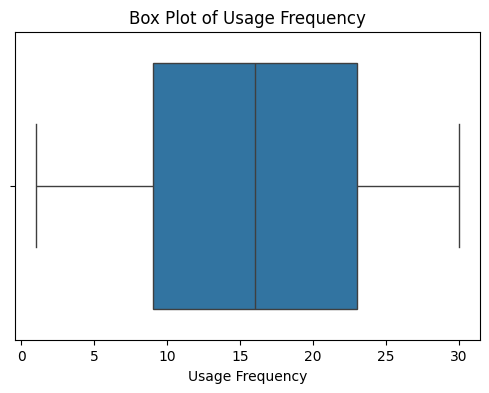

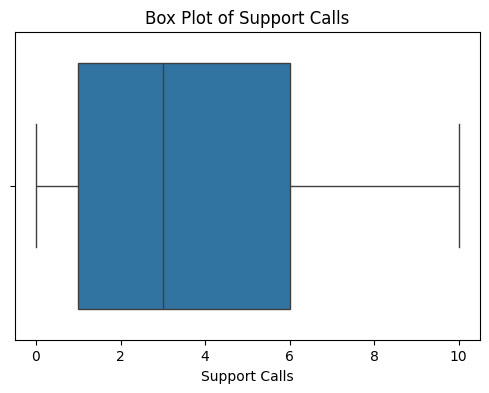

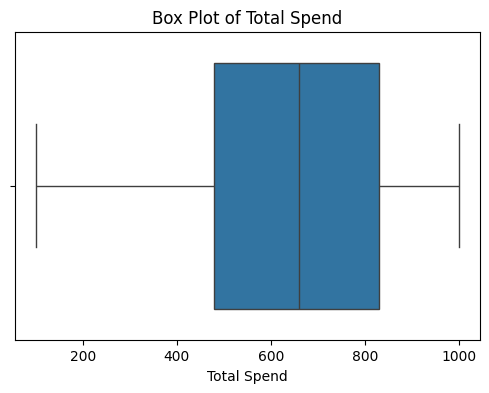

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df_train)
plt.title("Churn Distribution")
plt.show()

# Histograms for numerical features
df_train.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Box plots to detect outliers in key numerical features
numerical_features = ['Tenure', 'Usage Frequency', 'Support Calls', 'Total Spend']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_train[feature])
    plt.title(f"Box Plot of {feature}")
    plt.show()


## Correlation Analysis

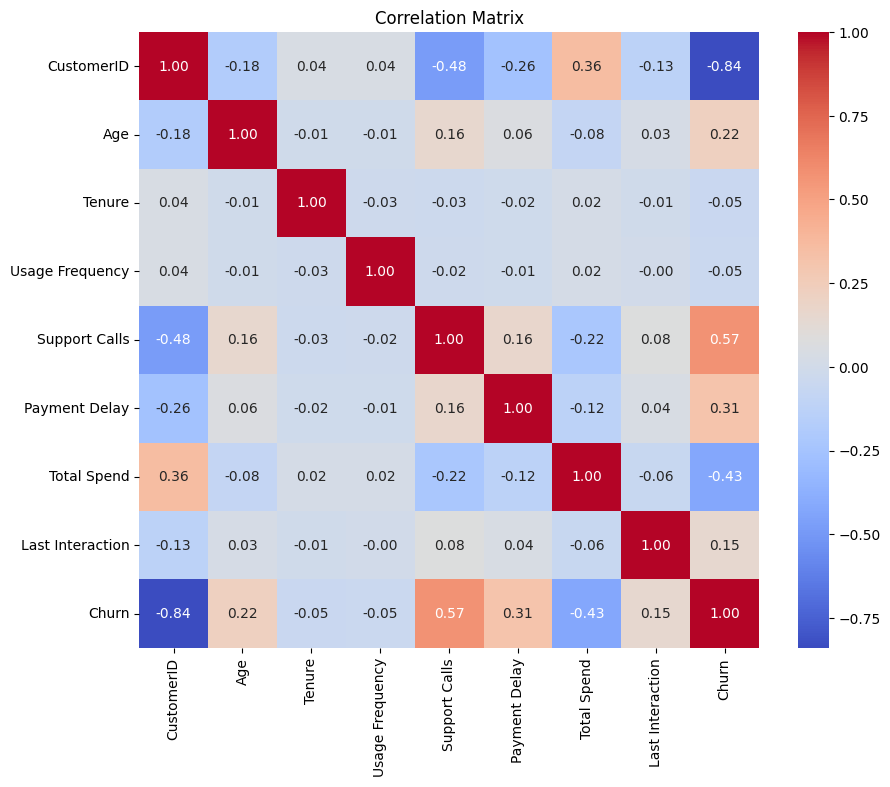

In [ ]:
# Select only the numeric columns for the correlation matrix
numeric_df_train = df_train.select_dtypes(include=['number'])

# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


# Step 3. Data Preparation Phase

In [ ]:
# One-hot encode categorical features
df_train = pd.get_dummies(df_train, columns=['Gender', 'Subscription Type', 'Contract Length'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Gender', 'Subscription Type', 'Contract Length'], drop_first=True)

# Ensure the columns in the test data match the train data
df_test = df_test.reindex(columns=df_train.columns, fill_value=0)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# List of numerical features to scale
numerical_features = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

# Scale the numerical features in both train and test datasets
df_train[numerical_features] = scaler.fit_transform(df_train[numerical_features])
df_test[numerical_features] = scaler.transform(df_test[numerical_features])


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_train.drop('Churn', axis=1)  # Adjust 'Churn' if needed
y = df_train['Churn']

# Split the data into 70% training and 30% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the resulting datasets
print("Training Set Shape:", X_train.shape)
print("Validation Set Shape:", X_val.shape)


Training Set Shape: (308583, 14)
Validation Set Shape: (132250, 14)


# Step 4. Modeling
Now, we’ll build and evaluate models to predict customer churn.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize models
log_reg = LogisticRegression()
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')


In [ ]:
# Train Logistic Regression with increased max_iter
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Train Random Forest
rf.fit(X_train, y_train)

# Train XGBoost with updated parameters
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:32:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

# Step 5. Evaluation

In [ ]:
# Check for missing values in y_train and y_val
print("Missing values in y_train:", y_train.isnull().sum())
print("Missing values in y_val:", y_val.isnull().sum())

# Fill missing values in y_val if needed
y_val = y_val.fillna(y_val.median())


Missing values in y_train: 0
Missing values in y_val: 1


In [ ]:
# Fill missing values with the median
X_train = X_train.fillna(X_train.median())
X_val = X_val.fillna(X_val.median())


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate Logistic Regression
y_pred_log_reg = log_reg.predict(X_val)
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_val, y_pred_log_reg))
print("Precision:", precision_score(y_val, y_pred_log_reg))
print("Recall:", recall_score(y_val, y_pred_log_reg))
print("F1 Score:", f1_score(y_val, y_pred_log_reg))

# Evaluate Random Forest
y_pred_rf = rf.predict(X_val)
print("\nRandom Forest Metrics:")
print("Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Precision:", precision_score(y_val, y_pred_rf))
print("Recall:", recall_score(y_val, y_pred_rf))
print("F1 Score:", f1_score(y_val, y_pred_rf))

# Evaluate XGBoost
y_pred_xgb = xgb.predict(X_val)
print("\nXGBoost Metrics:")
print("Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("Precision:", precision_score(y_val, y_pred_xgb))
print("Recall:", recall_score(y_val, y_pred_xgb))
print("F1 Score:", f1_score(y_val, y_pred_xgb))


Logistic Regression Metrics:
Accuracy: 0.9625179584120983
Precision: 0.9769712651504835
Recall: 0.9564562362509166
F1 Score: 0.9666049112406103

Random Forest Metrics:
Accuracy: 0.9993950850661626
Precision: 0.999160570811848
Recall: 0.9997733484434371
F1 Score: 0.9994668657034707

XGBoost Metrics:
Accuracy: 0.9999319470699433
Precision: 0.9999066791094521
Recall: 0.9999733351109926
F1 Score: 0.9999400059994


## Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validate Logistic Regression
log_reg_scores = cross_val_score(log_reg, X_train, y_train, cv=5)
print("Logistic Regression Cross-Validation Accuracy:", log_reg_scores.mean())

# Cross-validate Random Forest
rf_scores = cross_val_score(rf, X_train, y_train, cv=5)
print("Random Forest Cross-Validation Accuracy:", rf_scores.mean())

# Cross-validate XGBoost
xgb_scores = cross_val_score(xgb, X_train, y_train, cv=5)
print("XGBoost Cross-Validation Accuracy:", xgb_scores.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Cross-Validation Accuracy: 0.9622176257178647
Random Forest Cross-Validation Accuracy: 0.999257898860745


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:43:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:43:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:44:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:44:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:44:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost Cross-Validation Accuracy: 0.9999805563056968


## Feature Importance Analysis

In [ ]:
# Feature importance from Random Forest
importances_rf = rf.feature_importances_
features_rf = X_train.columns
feature_importance_rf = sorted(zip(importances_rf, features_rf), reverse=True)
print("\nRandom Forest Feature Importance:")
for importance, feature in feature_importance_rf:
    print(f"{feature}: {importance}")

# Feature importance from XGBoost
importances_xgb = xgb.feature_importances_
features_xgb = X_train.columns
feature_importance_xgb = sorted(zip(importances_xgb, features_xgb), reverse=True)
print("\nXGBoost Feature Importance:")
for importance, feature in feature_importance_xgb:
    print(f"{feature}: {importance}")



Random Forest Feature Importance:
CustomerID: 0.5785522715803509
Support Calls: 0.12386407264501653
Total Spend: 0.0816723879680401
Payment Delay: 0.06326857406083591
Contract Length_Monthly: 0.06246195196665411
Age: 0.045141747128577034
Last Interaction: 0.016023726745400316
Average Spend Per Month: 0.014106234017194135
Gender_Male: 0.0087041988194614
Tenure: 0.0022377453799667323
Contract Length_Quarterly: 0.002060842387383052
Usage Frequency: 0.0014382237124766447
Subscription Type_Premium: 0.00024231358110658236
Subscription Type_Standard: 0.00022571000753648219

XGBoost Feature Importance:
CustomerID: 0.943169891834259
Contract Length_Monthly: 0.012732835486531258
Payment Delay: 0.009592614136636257
Total Spend: 0.008850309066474438
Last Interaction: 0.005887433420866728
Gender_Male: 0.005687740631401539
Support Calls: 0.005007488653063774
Age: 0.004509975202381611
Tenure: 0.001347944838926196
Subscription Type_Standard: 0.0011411927407607436
Usage Frequency: 0.001041170908138156

## Evaluate on Testing Data

In [ ]:
# Step 1: Ensure preprocessing on df_test (same as df_train)
# Note: If not already done, handle missing values, encode categorical variables, and scale numerical features

# Step 2: Separate features and target
X_test = df_test.drop('Churn', axis=1)  # Drop the target column from features
y_test = df_test['Churn']  # Extract the target variable

# Step 3: Use the trained models to make predictions on the testing data
y_test_pred_log_reg = log_reg.predict(X_test)
y_test_pred_rf = rf.predict(X_test)
y_test_pred_xgb = xgb.predict(X_test)

# Step 4: Calculate evaluation metrics for each model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("\nLogistic Regression Test Metrics:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_log_reg))
print("Precision:", precision_score(y_test, y_test_pred_log_reg))
print("Recall:", recall_score(y_test, y_test_pred_log_reg))
print("F1 Score:", f1_score(y_test, y_test_pred_log_reg))

print("\nRandom Forest Test Metrics:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_rf))
print("Precision:", precision_score(y_test, y_test_pred_rf))
print("Recall:", recall_score(y_test, y_test_pred_rf))
print("F1 Score:", f1_score(y_test, y_test_pred_rf))

print("\nXGBoost Test Metrics:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_xgb))
print("Precision:", precision_score(y_test, y_test_pred_xgb))
print("Recall:", recall_score(y_test, y_test_pred_xgb))
print("F1 Score:", f1_score(y_test, y_test_pred_xgb))



Logistic Regression Test Metrics:
Accuracy: 0.47391804144530403
Precision: 0.47379217106183275
Recall: 0.999868822352671
F1 Score: 0.6429294420311248

Random Forest Test Metrics:
Accuracy: 0.49543293876409733
Precision: 0.48421269972364284
Recall: 0.9998032335290067
F1 Score: 0.652442351934086

XGBoost Test Metrics:
Accuracy: 0.50320004970951
Precision: 0.48807959752619606
Recall: 0.9990161676450333
F1 Score: 0.655774053623516


Churn Distribution in Training Data:
Churn
1.0    249999
0.0    190833
Name: count, dtype: int64


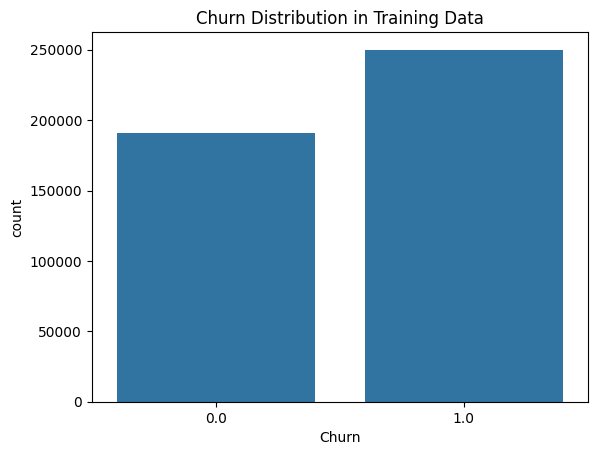

In [ ]:
# Check the distribution of the target variable in the training data
print("Churn Distribution in Training Data:")
print(df_train['Churn'].value_counts())

# Visualize the class distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df_train)
plt.title("Churn Distribution in Training Data")
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the classes
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Churn Distribution After SMOTE:")
print(pd.Series(y_train_balanced).value_counts())


Churn Distribution After SMOTE:
Churn
0.0    174995
1.0    174995
Name: count, dtype: int64


In [ ]:
# Re-train Logistic Regression
log_reg.fit(X_train_balanced, y_train_balanced)

# Re-train Random Forest
rf.fit(X_train_balanced, y_train_balanced)

# Re-train XGBoost
xgb.fit(X_train_balanced, y_train_balanced)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:50:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Evaluate Logistic Regression on testing data
y_test_pred_log_reg = log_reg.predict(X_test)
print("\nLogistic Regression Test Metrics After SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_log_reg))
print("Precision:", precision_score(y_test, y_test_pred_log_reg))
print("Recall:", recall_score(y_test, y_test_pred_log_reg))
print("F1 Score:", f1_score(y_test, y_test_pred_log_reg))

# Evaluate Random Forest on testing data
y_test_pred_rf = rf.predict(X_test)
print("\nRandom Forest Test Metrics After SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_rf))
print("Precision:", precision_score(y_test, y_test_pred_rf))
print("Recall:", recall_score(y_test, y_test_pred_rf))
print("F1 Score:", f1_score(y_test, y_test_pred_rf))

# Evaluate XGBoost on testing data
y_test_pred_xgb = xgb.predict(X_test)
print("\nXGBoost Test Metrics After SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_xgb))
print("Precision:", precision_score(y_test, y_test_pred_xgb))
print("Recall:", recall_score(y_test, y_test_pred_xgb))
print("F1 Score:", f1_score(y_test, y_test_pred_xgb))



Logistic Regression Test Metrics After SMOTE:
Accuracy: 0.5281014074005033
Precision: 0.5009496754587346
Recall: 0.9946873052831797
F1 Score: 0.6663224956063268

Random Forest Test Metrics After SMOTE:
Accuracy: 0.496706744959145
Precision: 0.4848441475826972
Recall: 0.9998032335290067
F1 Score: 0.6530153256294646

XGBoost Test Metrics After SMOTE:
Accuracy: 0.50320004970951
Precision: 0.48808074335148993
Recall: 0.9991145508805299
F1 Score: 0.6557962825438851


# 6. Deployment
The goal of this phase is to make the model available for use in a real-world environment, integrating it into business processes for decision-making.